In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [398]:
data= pd.read_csv("pima_diabetes_smote.csv")

In [399]:
data.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'BloodPressure',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [400]:
data.shape

(662, 9)

In [401]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
SkinThickness               0
BMI                         0
BloodPressure               0
Insulin                     0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [402]:
data.dtypes

Pregnancies                 float64
Glucose                     float64
SkinThickness               float64
BMI                         float64
BloodPressure               float64
Insulin                     float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [403]:
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
data['BloodPressure'] = data['BloodPressure'].interpolate(method='linear')

print(data)

     Pregnancies     Glucose  SkinThickness        BMI  BloodPressure  \
0       3.000000   89.000000      74.000000  16.000000      85.000000   
1       2.000000   81.000000      72.000000  15.000000      76.000000   
2       0.000000   95.000000      80.000000  45.000000      92.000000   
3      12.000000  140.000000      85.000000  33.000000      93.000000   
4       2.000000  112.000000      68.000000  22.000000      94.000000   
..           ...         ...            ...        ...            ...   
657     8.091799  126.376986      95.816402   0.000000     223.178334   
658     7.529215  125.659099      94.493488   0.000000     213.322456   
659    11.754347  152.394560     107.771734   0.000000     203.466578   
660     3.081958  173.713147      57.918042  22.204895     193.610700   
661     8.123349  160.493395      83.649339  22.928633     193.610700   

       Insulin  DiabetesPedigreeFunction        Age  Outcome  
0    30.400000                  0.551000  38.000000        0

In [404]:
data['BMI'] = data['BMI'].replace(0, np.nan)
data['BMI'] = data['BMI'].interpolate(method='linear')
print(data)

     Pregnancies     Glucose  SkinThickness        BMI  BloodPressure  \
0       3.000000   89.000000      74.000000  16.000000      85.000000   
1       2.000000   81.000000      72.000000  15.000000      76.000000   
2       0.000000   95.000000      80.000000  45.000000      92.000000   
3      12.000000  140.000000      85.000000  33.000000      93.000000   
4       2.000000  112.000000      68.000000  22.000000      94.000000   
..           ...         ...            ...        ...            ...   
657     8.091799  126.376986      95.816402  31.525585     223.178334   
658     7.529215  125.659099      94.493488  28.418688     213.322456   
659    11.754347  152.394560     107.771734  25.311791     203.466578   
660     3.081958  173.713147      57.918042  22.204895     193.610700   
661     8.123349  160.493395      83.649339  22.928633     193.610700   

       Insulin  DiabetesPedigreeFunction        Age  Outcome  
0    30.400000                  0.551000  38.000000        0

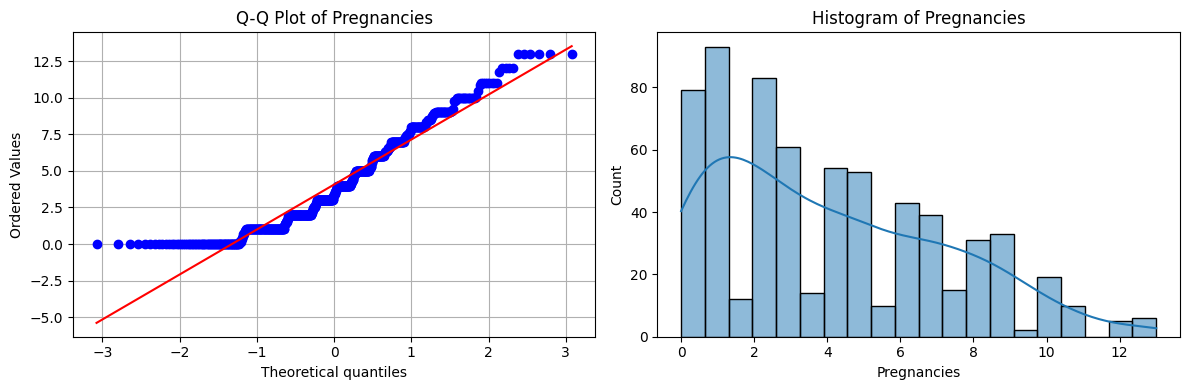

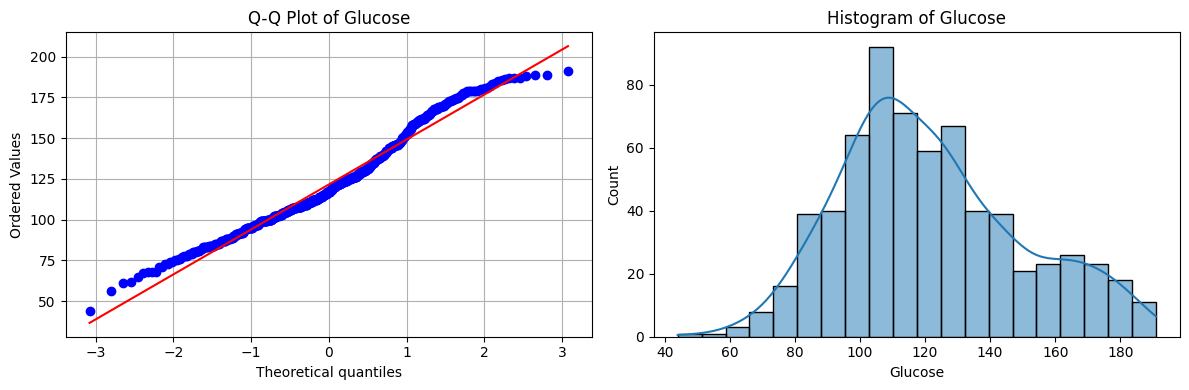

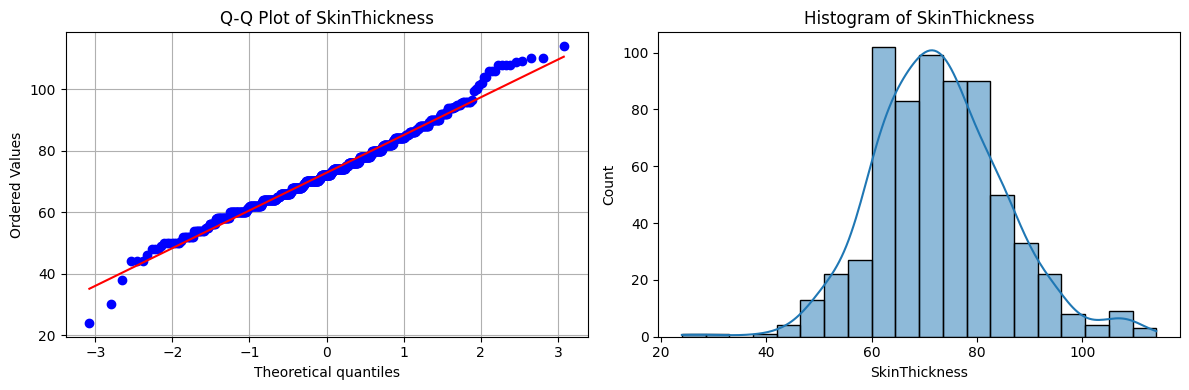

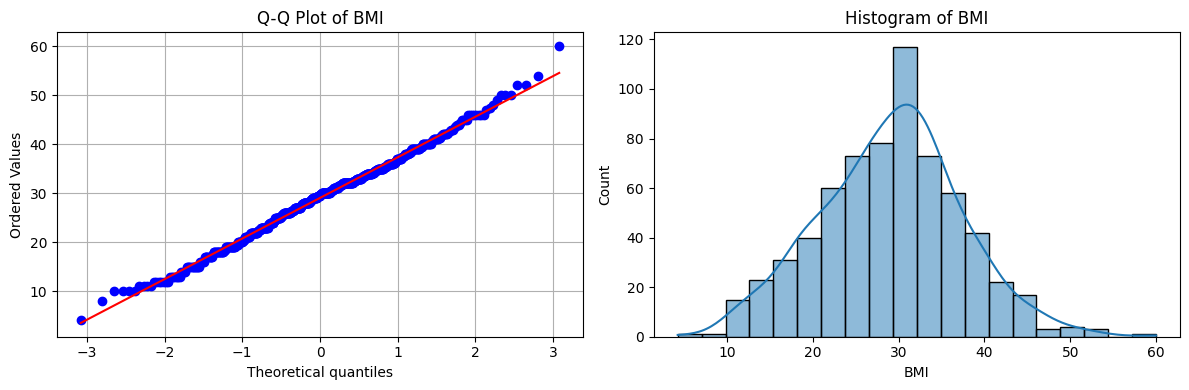

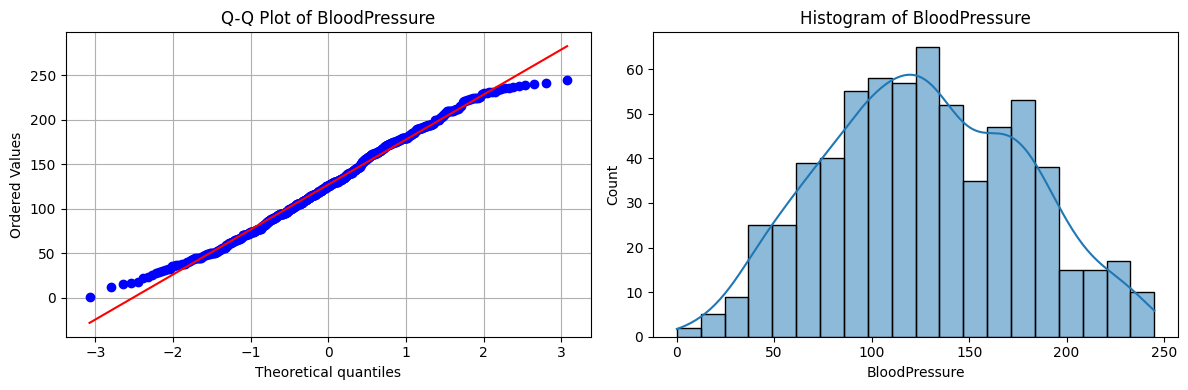

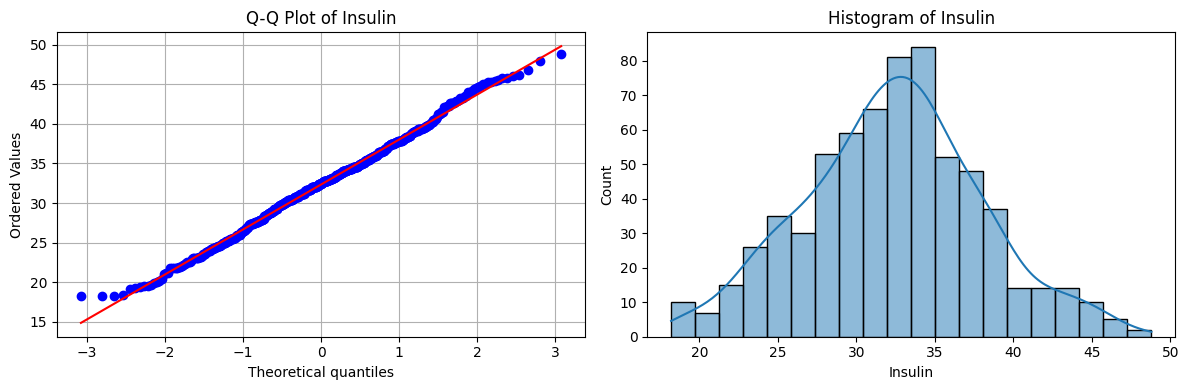

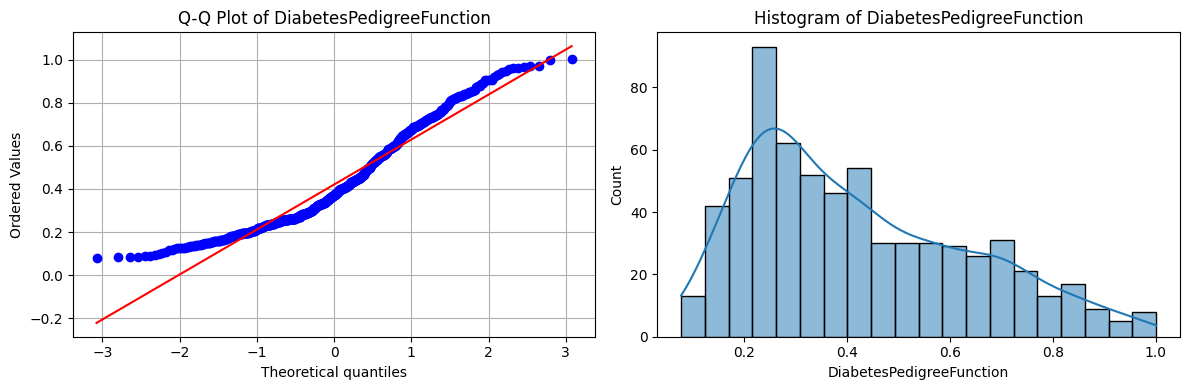

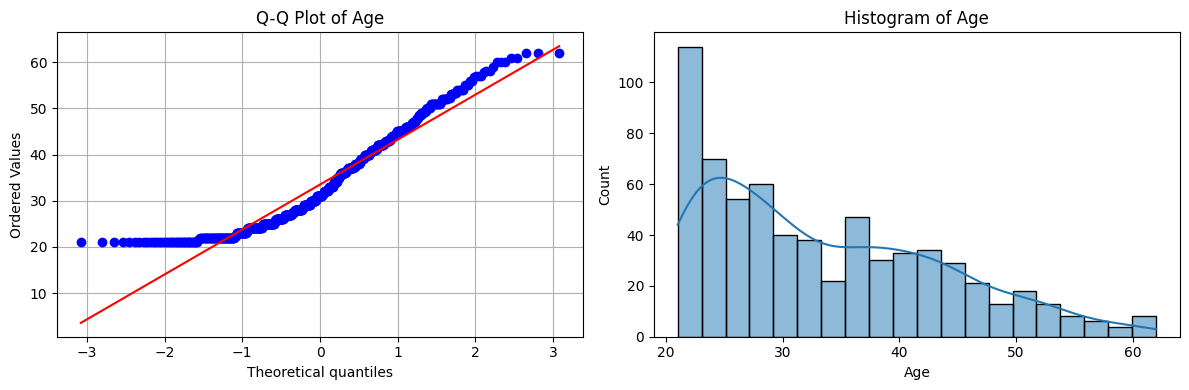

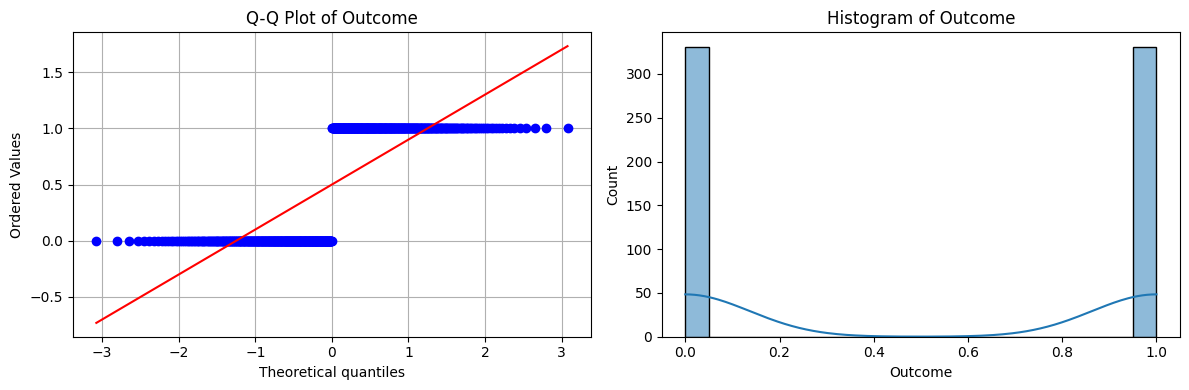

In [405]:
num_cols = [col for col in data.select_dtypes(include=['int64', 'float64'])]

for column in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  
    
    stats.probplot(data[column], dist="norm", plot=axes[0])
    axes[0].set_title(f'Q-Q Plot of {column}')
    axes[0].grid(True)

    sns.histplot(data[column], bins=20, kde=True, ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

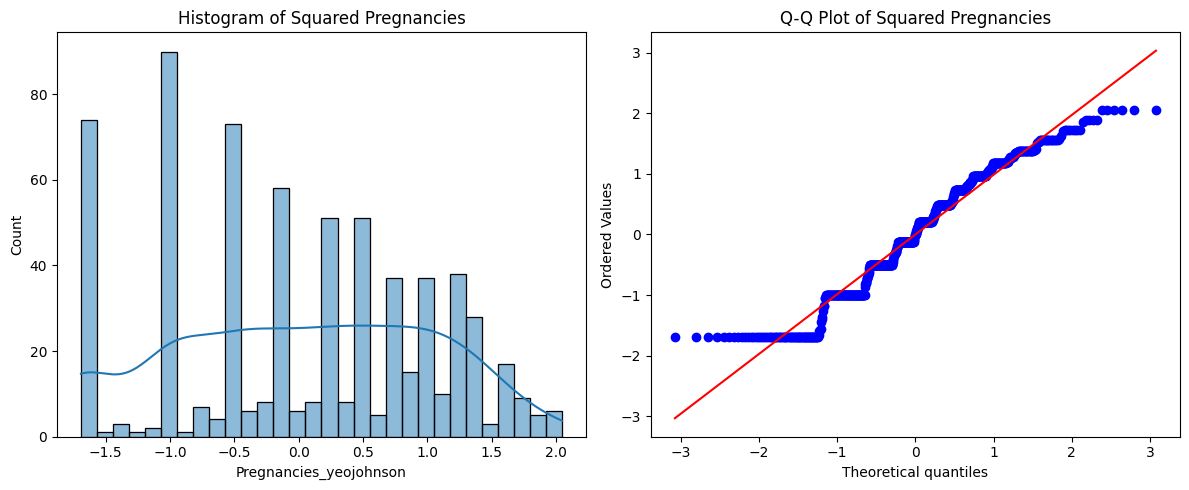

In [406]:
pt = PowerTransformer(method='yeo-johnson')  
data['Pregnancies_yeojohnson'] = pt.fit_transform(data[['Pregnancies']])
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Pregnancies_yeojohnson'], kde=True, bins=30)
plt.title('Histogram of Squared Pregnancies')

plt.subplot(1, 2, 2)
stats.probplot(data['Pregnancies_yeojohnson'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Squared Pregnancies')

plt.tight_layout()
plt.show()

In [407]:
data.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'BloodPressure',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_yeojohnson'],
      dtype='object')

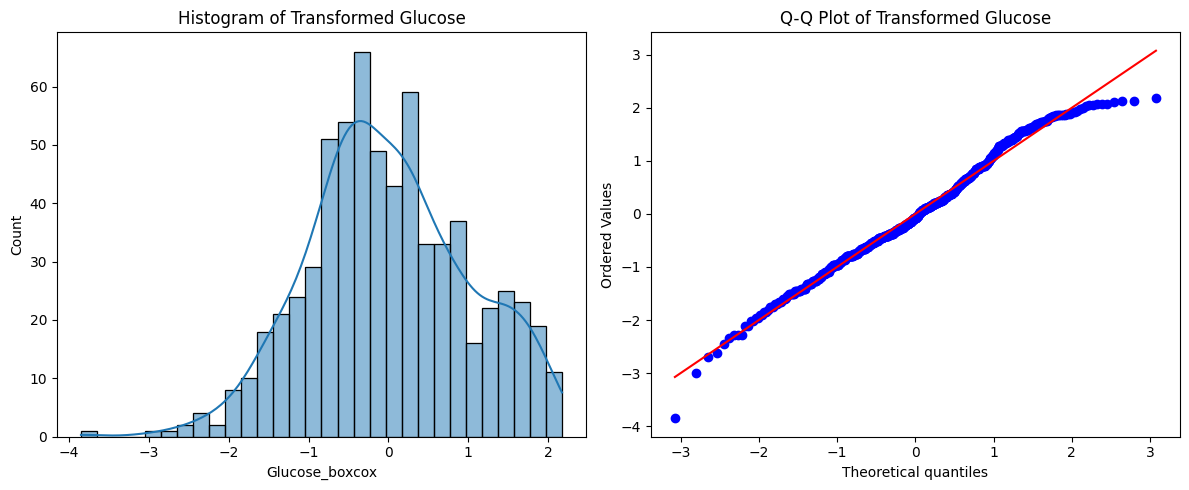

In [408]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['Glucose_boxcox'] = boxcox_transformer.fit_transform(data[['Glucose']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Glucose_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed Glucose')

plt.subplot(1, 2, 2)
stats.probplot(data['Glucose_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed Glucose')

plt.tight_layout()
plt.show()

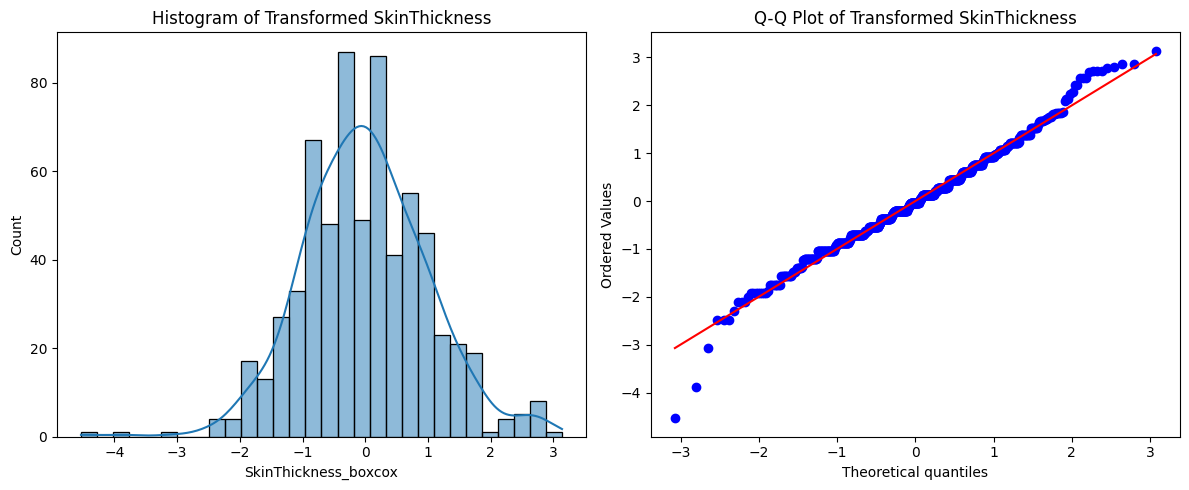

In [409]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['SkinThickness_boxcox'] = boxcox_transformer.fit_transform(data[['SkinThickness']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['SkinThickness_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed SkinThickness')

plt.subplot(1, 2, 2)
stats.probplot(data['SkinThickness_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed SkinThickness')

plt.tight_layout()
plt.show()


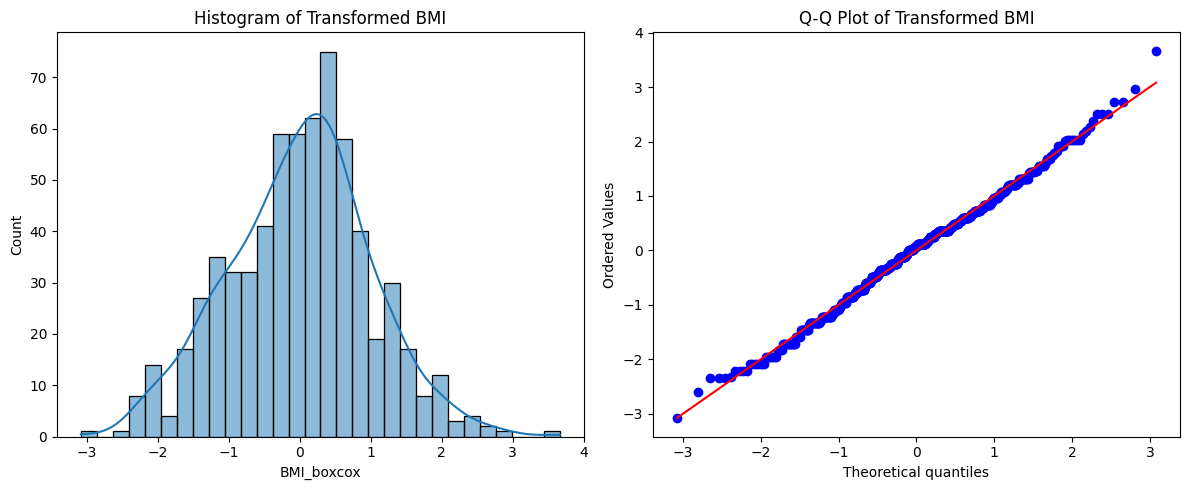

In [410]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['BMI_boxcox'] = boxcox_transformer.fit_transform(data[['BMI']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['BMI_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed BMI')

plt.subplot(1, 2, 2)
stats.probplot(data['BMI_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed BMI')

plt.tight_layout()
plt.show()

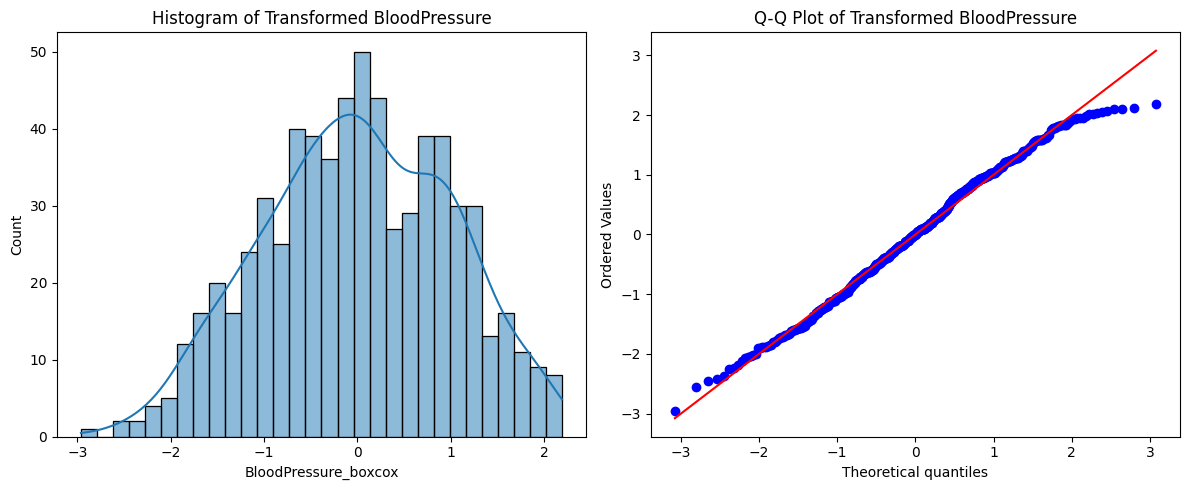

In [411]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['BloodPressure_boxcox'] = boxcox_transformer.fit_transform(data[['BloodPressure']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['BloodPressure_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed BloodPressure')

plt.subplot(1, 2, 2)
stats.probplot(data['BloodPressure_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed BloodPressure')

plt.tight_layout()
plt.show()

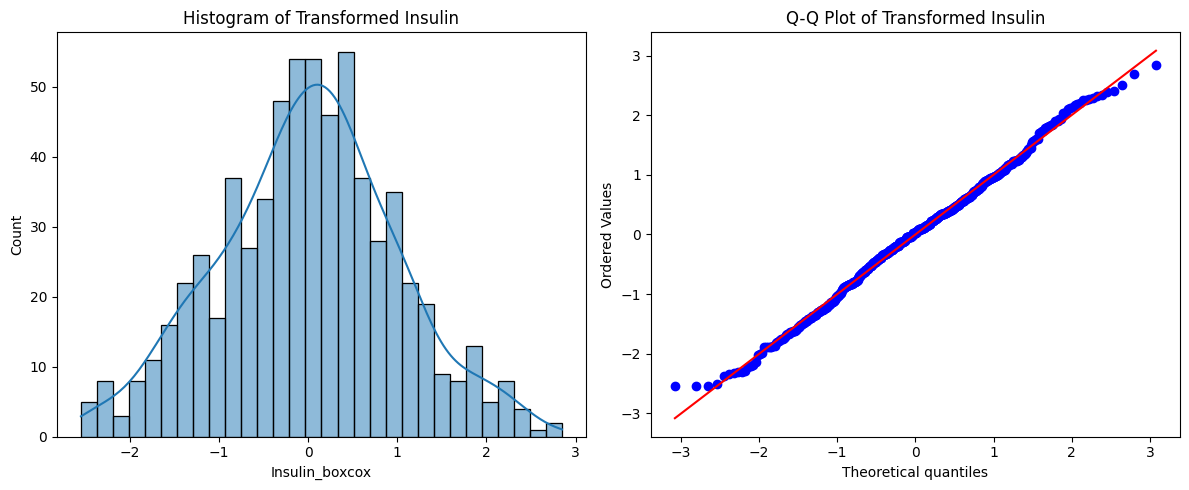

In [412]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['Insulin_boxcox'] = boxcox_transformer.fit_transform(data[['Insulin']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Insulin_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed Insulin')

plt.subplot(1, 2, 2)
stats.probplot(data['Insulin_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed Insulin')

plt.tight_layout()
plt.show()

In [413]:
data.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'BloodPressure',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_yeojohnson', 'Glucose_boxcox', 'SkinThickness_boxcox',
       'BMI_boxcox', 'BloodPressure_boxcox', 'Insulin_boxcox'],
      dtype='object')

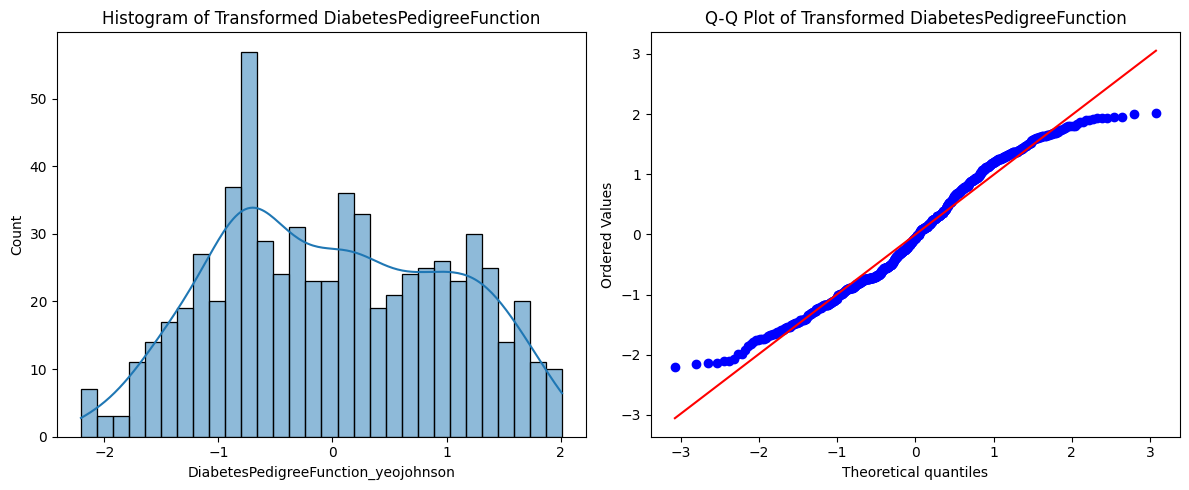

In [414]:
pt = PowerTransformer(method='yeo-johnson')  
data['DiabetesPedigreeFunction_yeojohnson'] = pt.fit_transform(data[['DiabetesPedigreeFunction']])
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(data['DiabetesPedigreeFunction_yeojohnson'], kde=True, bins=30)
plt.title('Histogram of Transformed DiabetesPedigreeFunction')

plt.subplot(1, 2, 2)
stats.probplot(data['DiabetesPedigreeFunction_yeojohnson'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed DiabetesPedigreeFunction')

plt.tight_layout()
plt.show()

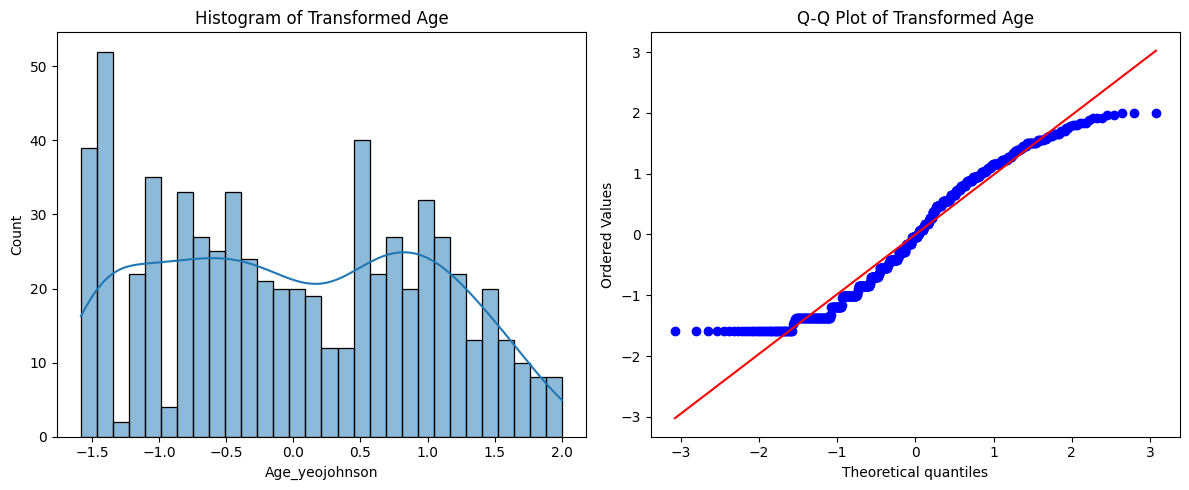

In [415]:
pt = PowerTransformer(method='yeo-johnson')  
data['Age_yeojohnson'] = pt.fit_transform(data[['Age']])
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(data['Age_yeojohnson'], kde=True, bins=30)
plt.title('Histogram of Transformed Age')

plt.subplot(1, 2, 2)
stats.probplot(data['Age_yeojohnson'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed Age')

plt.tight_layout()
plt.show()

In [416]:
data.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'BloodPressure',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_yeojohnson', 'Glucose_boxcox', 'SkinThickness_boxcox',
       'BMI_boxcox', 'BloodPressure_boxcox', 'Insulin_boxcox',
       'DiabetesPedigreeFunction_yeojohnson', 'Age_yeojohnson'],
      dtype='object')

In [417]:
data.head(10)

,Pregnancies,Glucose,SkinThickness,BMI,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_yeojohnson,Glucose_boxcox,SkinThickness_boxcox,BMI_boxcox,BloodPressure_boxcox,Insulin_boxcox,DiabetesPedigreeFunction_yeojohnson,Age_yeojohnson
0,3.0,89.0,74.0,16.0,85.0,30.4,0.551,38.0,0,-0.124933,-1.227155,0.119458,-1.589634,-0.811554,-0.333827,0.759204,0.641360
1,2.0,81.0,72.0,15.0,76.0,30.1,0.547,25.0,0,-0.510454,-1.604486,-0.042801,-1.714015,-1.001478,-0.387039,0.743687,-0.852883
2,0.0,95.0,80.0,45.0,92.0,36.5,0.330,26.0,0,-1.691349,-0.960653,0.598593,1.909628,-0.666278,0.737569,-0.286494,-0.698081
3,12.0,140.0,85.0,33.0,93.0,37.4,0.244,41.0,0,1.891542,0.714069,0.989725,0.481204,-0.645686,0.894068,-0.828334,0.877573
4,2.0,112.0,68.0,22.0,94.0,34.1,0.315,26.0,0,-0.510454,-0.268996,-0.371419,-0.850428,-0.625132,0.318336,-0.374378,-0.698081
5,0.0,102.0,86.0,17.0,105.0,29.3,0.695,27.0,0,-1.691349,-0.665354,1.067118,-1.465624,-0.401475,-0.529196,1.255335,-0.552165
6,0.0,93.0,60.0,16.0,122.5,35.3,0.263,25.0,0,-1.691349,-1.048036,-1.046593,-1.589634,-0.053880,0.528306,-0.700314,-0.852883
7,1.0,97.0,66.0,15.0,140.0,23.2,0.487,22.0,0,-0.996063,-0.874648,-0.537883,-1.714015,0.285079,-1.626770,0.497760,-1.380464
8,1.0,114.0,66.0,36.0,200.0,38.1,0.289,21.0,0,-0.996063,-0.192962,-0.537883,0.840344,1.396689,1.015531,-0.533060,-1.581464
9,3.0,120.0,70.0,30.0,135.0,42.9,0.452,30.0,0,-0.124933,0.029251,-0.206410,0.120498,0.189034,1.842680,0.341954,-0.160193


In [418]:
data.to_csv("pima_diabetes_featured.csv", index=False)

print("SMOTE-applied dataset saved as 'pima_diabetes_featured.csv'")

SMOTE-applied dataset saved as 'pima_diabetes_featured.csv'
